# Import

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir('../..')

# Data

In [3]:
snapshots = pd.read_csv('data/truncated_LOB_data_BTC_USD_COINBASE.csv')
snapshots

,timestamp,bid_prices_0,ask_prices_0,bid_quantity_0,ask_quantity_0,bid_prices_1,ask_prices_1,bid_quantity_1,ask_quantity_1,bid_prices_2,...,bid_quantity_2,ask_quantity_2,bid_prices_3,ask_prices_3,bid_quantity_3,ask_quantity_3,bid_prices_4,ask_prices_4,bid_quantity_4,ask_quantity_4
0,2023-10-02 00:00:00.047811072,27995.45,27995.46,2.969115,0.171891,27994.28,27996.67,0.115522,0.020000,27994.26,...,0.077051,0.001200,27993.74,27998.00,0.042005,0.500000,27993.73,27998.06,0.186802,0.161504
1,2023-10-02 00:00:00.199801088,27995.45,27995.46,2.969115,0.171891,27994.28,27996.67,0.078016,0.020000,27994.26,...,0.077051,0.001200,27993.74,27998.00,0.042005,0.500000,27993.73,27998.06,0.186802,0.161504
2,2023-10-02 00:00:00.242750976,27995.45,27995.46,2.969115,0.421891,27994.28,27996.67,0.078016,0.020000,27994.26,...,0.077051,0.001200,27993.74,27998.00,0.042005,0.500000,27993.73,27998.06,0.186802,0.161504
3,2023-10-02 00:00:00.303438848,27995.45,27995.46,2.969115,0.421891,27994.28,27996.67,0.078016,0.020000,27994.26,...,0.077051,0.040000,27993.74,27997.99,0.042005,0.001200,27993.73,27998.00,0.186802,0.500000
4,2023-10-02 00:00:00.395410176,27995.45,27995.46,2.969115,0.420490,27994.28,27996.67,0.078016,0.020000,27994.26,...,0.077051,0.040000,27993.74,27997.99,0.042005,0.001200,27993.73,27998.00,0.186802,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103081,2023-10-02 00:10:12.153671936,27968.27,27970.24,0.171501,0.020000,27968.26,27970.25,0.020000,0.053564,27967.98,...,0.072000,0.053628,27967.27,27971.29,0.271732,0.214506,27966.76,27971.32,0.452887,0.028795
103082,2023-10-02 00:10:12.154450944,27968.28,27970.24,0.158101,0.020000,27968.27,27970.25,0.171501,0.053564,27968.26,...,0.020000,0.053628,27967.98,27971.29,0.072000,0.214506,27967.27,27971.32,0.271732,0.028795
103083,2023-10-02 00:10:12.158212864,27968.28,27970.24,0.158101,0.020000,27968.27,27970.25,0.171501,0.053564,27968.26,...,0.020000,0.053628,27967.98,27971.29,0.072000,0.214506,27967.28,27971.32,0.040000,0.028795
103084,2023-10-02 00:10:12.158674944,27968.28,27970.24,0.158101,0.020000,27968.27,27970.25,0.171501,0.053564,27968.26,...,0.020000,0.053628,27967.98,27971.28,0.072000,0.040000,27967.28,27971.29,0.040000,0.214506


In [4]:
messages = pd.read_csv('data/orders_data_btc_usd_coinbase.csv')
messages['timestamp_insertion'] = pd.to_datetime(messages['timestamp_insertion'],unit='ms')
messages

,Unnamed: 0,timestamp_insertion,side,price,q_ini,q_rem,cause,is_modified,distance_from_bbo_insertion,distance_from_bbo_insertion_bps,ba_spread_insertion,ba_spread_insertion_bps,bbo_imbalance,limit_order_flow_imbalance,roll_hf_volatility_insertion,lifetime
0,0,1970-01-20 07:13:26.400396678,B,21146.03,0.008668,0.008668,2,False,228,1.078082,72,0.340447,0.605196,1.000000,0.00000,116492
1,1,1970-01-20 07:13:26.400396816,S,21161.16,0.330984,0.330984,2,False,1213,5.735585,72,0.340447,0.605196,-1.000000,0.00000,70233598
2,2,1970-01-20 07:13:26.400400967,S,21150.17,0.053613,0.053613,2,False,114,0.539041,72,0.340447,0.605196,-1.000000,0.00000,3220
3,3,1970-01-20 07:13:26.400405205,S,21150.73,0.053613,0.053613,2,False,170,0.803833,72,0.340447,0.605196,-1.000000,0.00000,3188
4,4,1970-01-20 07:13:26.400416786,S,21150.73,0.053613,0.053613,2,False,170,0.803833,72,0.340447,0.605196,-1.000000,0.00000,3594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485369,485369,1970-01-20 07:13:28.883785478,B,21345.16,0.624486,0.624486,0,False,1889,8.841402,268,1.254365,-0.394415,0.868548,0.00061,218
485370,485370,1970-01-20 07:13:28.883785570,S,21372.35,0.048000,0.048000,0,False,562,2.630422,268,1.254365,-0.394415,0.866157,0.00061,126
485371,485371,1970-01-20 07:13:28.883785570,S,21376.80,0.048000,0.048000,0,False,1007,4.713230,268,1.254365,-0.394415,0.863772,0.00061,126
485372,485372,1970-01-20 07:13:28.883785696,S,21395.48,0.101593,0.101593,0,False,2875,13.456342,268,1.254365,-0.394415,0.858745,0.00061,0


1. **timestamp_insertion**: The timestamp when the order was inserted into the order book.

2. **side**: The side of the order, indicating whether it's a buy or sell order.

3. **price**: The price at which the limit order is placed.

4. **q_ini**: The initial quantity of the order when it was inserted.

5. **q_rem**: The remaining quantity of the order at the current timestamp.

6. **cause**: The reason or cause for any modifications or cancellations to the order.

7. **is_modified**: A binary indicator (possibly 0 or 1) to indicate whether the order has been modified.

8. **distance_from_bbo_insertion**: The distance from the order's price to the best bid or best offer in the order book at the time of insertion.

9. **distance_from_bbo_insertion_bps**: The distance from the order's price to the best bid or best offer in basis points at the time of insertion.

10. **ba_spread_insertion**: The bid-ask spread at the time of order insertion.

11. **ba_spread_insertion_bps**: The bid-ask spread in basis points at the time of order insertion.

12. **bbo_imbalance**: Imbalance between the quantity available at the best bid and best offer.

13. **limit_order_flow_imbalance**: Imbalance in the flow of limit orders, possibly indicating the dominance of buy or sell orders.

14. **roll_hf_volatility_insertion**: High-frequency volatility at the time of order insertion.

15. **lifetime**: The lifespan or duration of the order in the order book.

# First look

![Reminder](../../figures/LOB.png)

In [5]:
def parse_side(side):
    if side == 'B':
        return 1
    elif side == 'S':
        return -1
    else:
        return 0
messages['side_int'] = messages['side'].apply(parse_side)

I create a *level* integer feature, which is equal to 0 when the order corresponds to the best price, increases if the order is further away from the midprice, and becomes negative when the order is inside the spread.  
**Warning: distance_from_bbo_insertion is not distance from best bid offer at insertion**

In [6]:
messages['level'] = messages['distance_from_bbo_insertion']-messages['ba_spread_insertion']

Text(0, 0.5, 'Relative frequency')

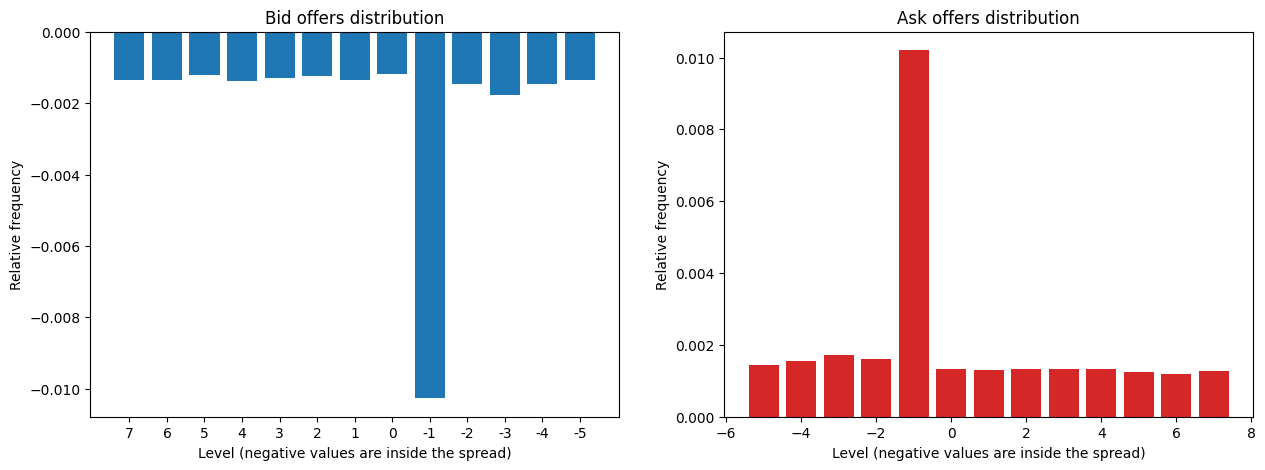

In [7]:
# vizualize level
bid_levels = messages[messages['side_int']==1].groupby('level')['level'].count()
ask_levels = messages[messages['side_int']==-1].groupby('level')['level'].count()

fig,axs = plt.subplots(1,2,figsize=(15,5))

# warning, I reversed the x axis (feels more intuitive)
ax = axs[0]
bid_levels_selection = bid_levels.loc[-5:7]
ax.bar(-bid_levels_selection.index,-bid_levels_selection.values/sum(bid_levels),color='tab:blue')
ax.set_title('Bid offers distribution')
ax.set_xlabel('Level (negative values are inside the spread)')
ax.set_ylabel('Relative frequency')
ax.set_xticks(ticks=-bid_levels_selection.index,labels=bid_levels_selection.index)

# ask side
ax = axs[1]
ask_levels_selection = ask_levels.loc[-5:7]
ax.bar(ask_levels_selection.index,ask_levels_selection.values/sum(ask_levels),color='tab:red')
ax.set_title('Ask offers distribution')
ax.set_xlabel('Level (negative values are inside the spread)')
ax.set_ylabel('Relative frequency')

The spikes at -1 correspond to *pegged* orders.

Text(0.5, 1.0, 'Spread distribution')

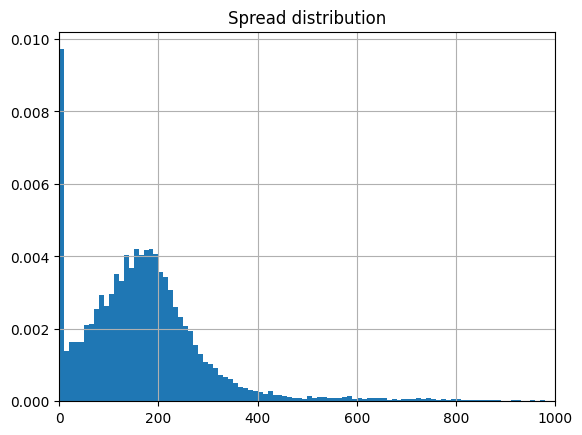

In [57]:
messages['ba_spread_insertion'].hist(bins=range(0, 1001, 10),density=True)
plt.xlim(0,1000)
plt.title('Spread distribution')

Text(0.5, 1.0, 'Cause distribution')

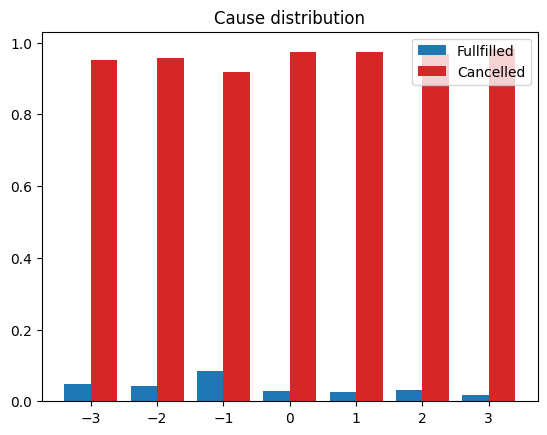

In [11]:
# cause distribution
cause_distribution = {}
for level in range(-3,4):
        cause_count = messages[messages['level']==level].groupby('cause')['cause'].count()
        cause_distribution[level] = cause_count/cause_count.sum()
plt.bar(x=range(-3,4),height=[v[1] for v in cause_distribution.values()],align='edge',width=-0.4,color='tab:blue',label='Fullfilled')
plt.bar(x=range(-3,4),height=[v[2] for v in cause_distribution.values()],align='edge',width=0.4,color='tab:red',label='Cancelled')
plt.legend()
plt.title('Cause distribution')

# Descriptive statistics
Reproducing table 2 and table 3

In [24]:
trades = messages[messages['cause']==1]
(trades['timestamp_insertion'].max()-trades['timestamp_insertion'].min())

Timedelta('0 days 00:00:02.483008239')

In [29]:
# from snapshots
table2 = snapshots[['bid_prices_0', 'ask_prices_0', 'bid_quantity_0',
       'ask_quantity_0']]
table2['midprice'] = (table2['bid_prices_0'] + table2['ask_prices_0'])/2
table2['spread'] = (table2['ask_prices_0'] - table2['bid_prices_0'])
table2 = table2.mean()
trades = messages[messages['cause']==1]
trades_per_min = 60*len(trades)/(trades['timestamp_insertion'].max()-trades['timestamp_insertion'].min()).total_seconds()
table2['trades_per_min'] = trades_per_min

# avg prices and spread
display(table2.to_frame().T)

C:\Users\Paul\AppData\Local\Temp\ipykernel_3316\3572186166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2['midprice'] = (table2['bid_prices_0'] + table2['ask_prices_0'])/2
C:\Users\Paul\AppData\Local\Temp\ipykernel_3316\3572186166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2['spread'] = (table2['ask_prices_0'] - table2['bid_prices_0'])


,bid_prices_0,ask_prices_0,bid_quantity_0,ask_quantity_0,midprice,spread,trades_per_min
0,27990.32891,27991.97763,0.173246,0.16843,27991.15327,1.648719,328537.000284


In [41]:
# table 3
table3 = pd.DataFrame(cause_distribution).T
table3 = table3.rename(columns={1:"Executed (%)",2:"Canceled (%)"})
filltime = trades.groupby('level')['lifetime'].mean()
table3['filltime (s)'] = filltime*0.001
table3

cause,Executed (%),Canceled (%),filltime (s)
-3,0.049412,0.950588,281.682262
-2,0.042895,0.957105,1786.581250
-1,0.083300,0.916700,715.529285
0,0.027642,0.972358,1174.156000
1,0.026398,0.973602,589.638294
2,0.032258,0.967742,1074.855750
3,0.018809,0.981191,251.988750


# Kaplan-Meier estimates

In [39]:
def compute_km_estimate(df):
    "Compute the Kaplan-Meier estimate of the survival function of the lifetime distribution.
    The dataframe only needs to have the following columns:
    - lifetime
    - cause"
    sorted_df = df.sort_values(by='lifetime').reset_index()
    sorted_df['num_survivors'] = len(sorted_df)-sorted_df.index
    sorted_df.set_index('lifetime',inplace=True)
    km_factors = 1-(sorted_df['cause']==1)/sorted_df['num_survivors']
    km_estimate = km_factors.cumprod()
    return km_estimate

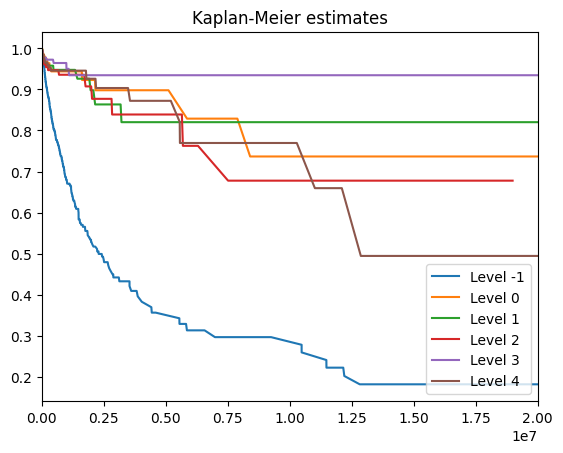

In [56]:
# KM estimates
for level in range(-1,5):
    df = messages[messages['level']==level]
    km_estimate = compute_km_estimate(df)
    plt.plot(km_estimate,label='Level '+str(level))
plt.xlim(0,0.2e8)
plt.legend()
plt.title('Kaplan-Meier estimates')
plt.show()